<a href="https://colab.research.google.com/github/Muhammad-Farhan-A/Kelompok-2-APM-B/blob/main/Prak5_KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
#import dataset
data = pd.read_csv('Live Seller.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
data.drop(['status_id', 'status_published'], axis=1, inplace=True)

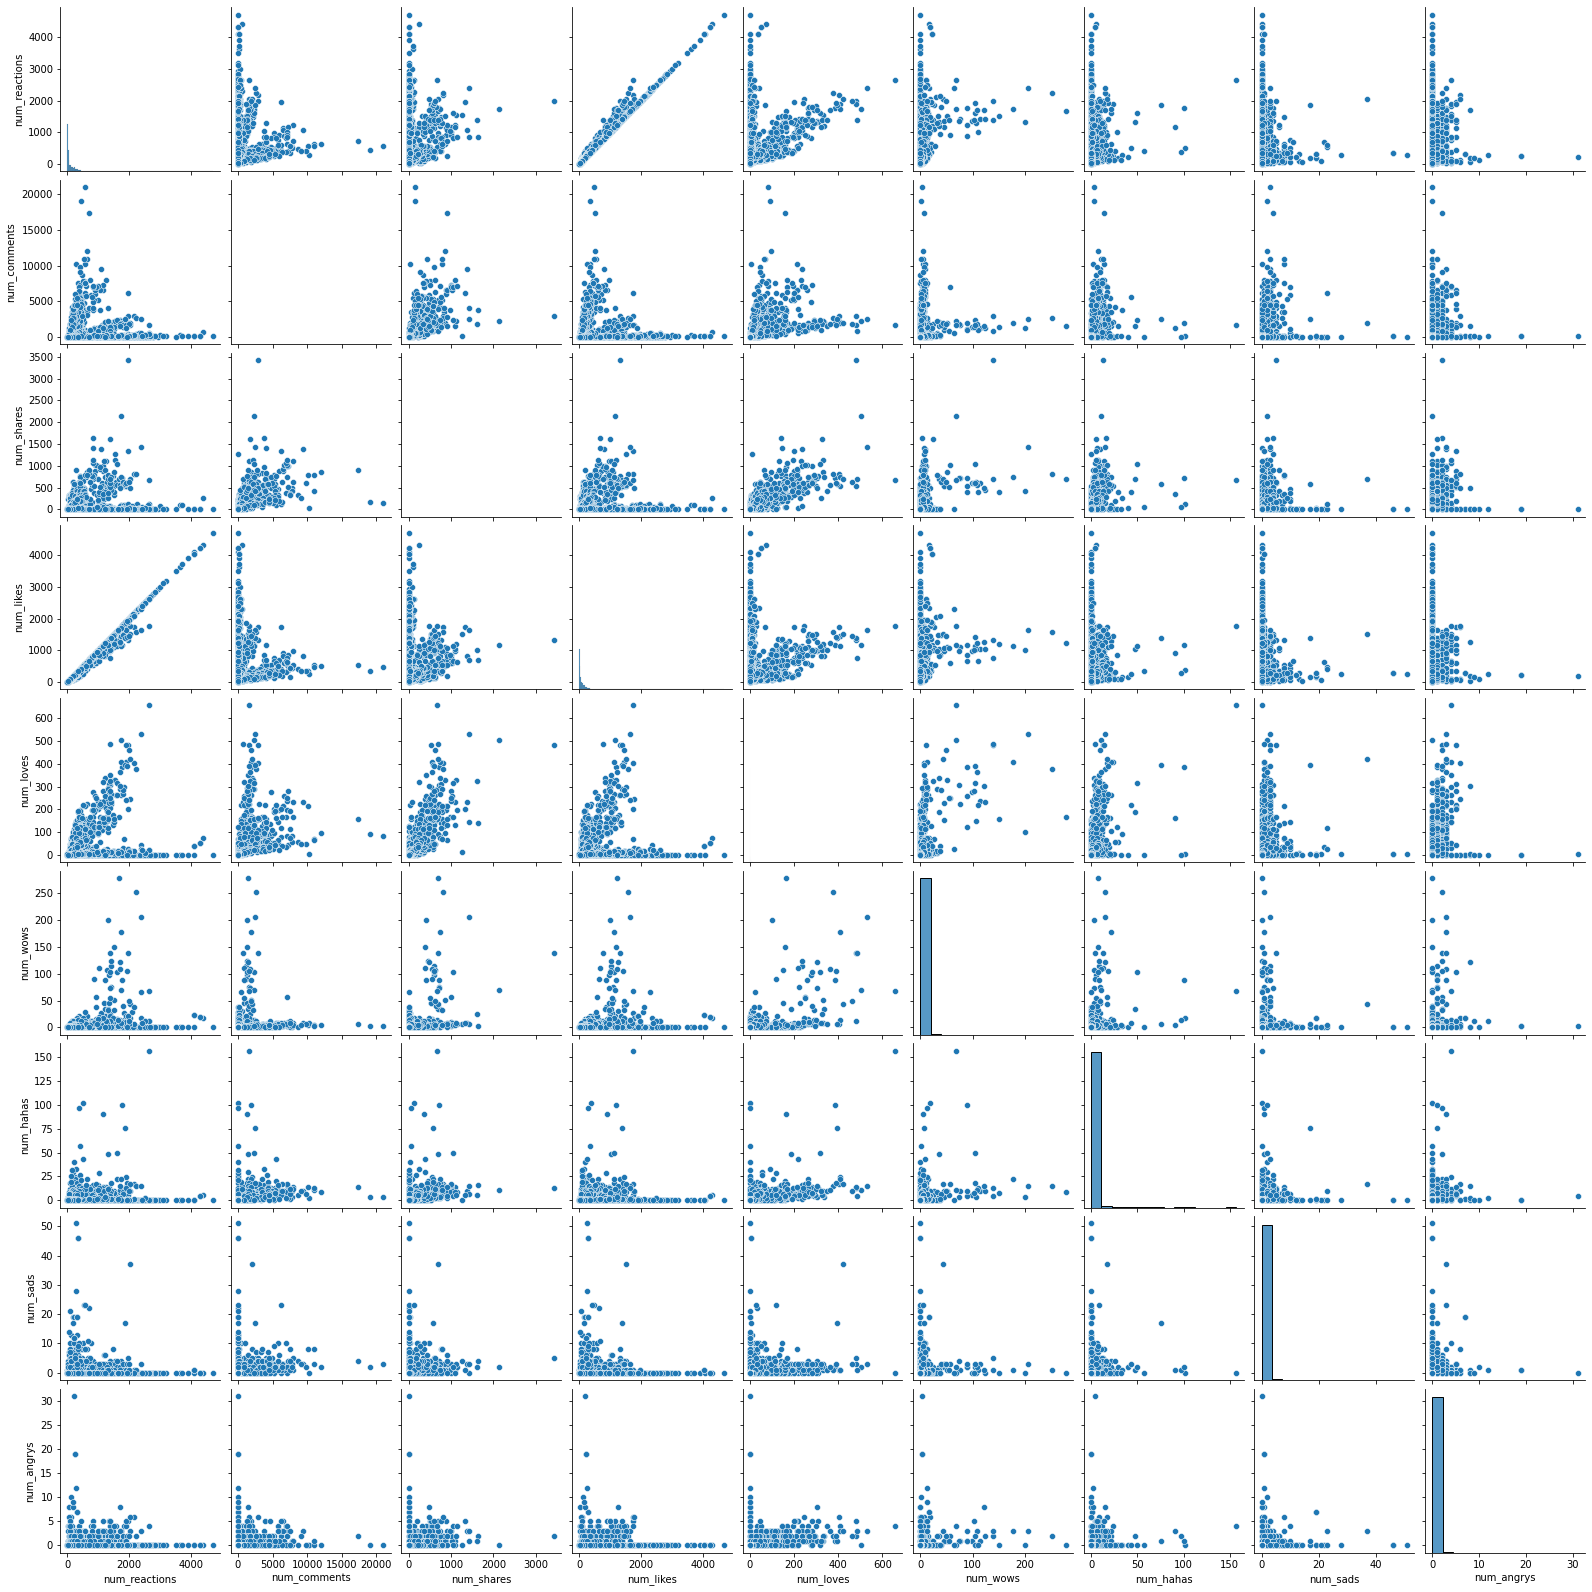

In [ ]:
sns.pairplot(data)

In [ ]:
# feature vector
X = data

# target variable
y = data['status_type']

In [ ]:
#convert non-numeric ke numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

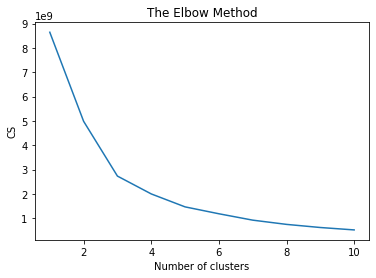

In [ ]:
#menghitung nilai k optimal
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
#kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

In [ ]:
#accuracy
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4077 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

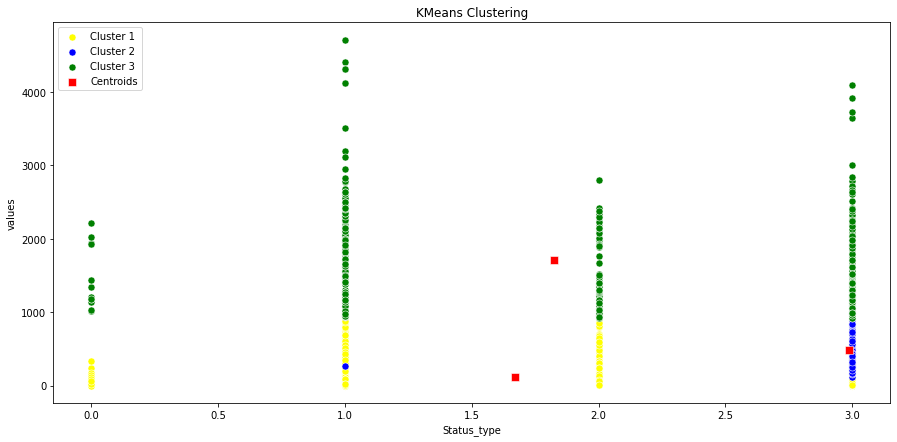

In [ ]:
# k-means algorithm
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = np.array(X)

plt.figure(figsize=(15,7))

# visualisasi kluster
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids', s=50, marker=',')


plt.title('KMeans Clustering')
plt.xlabel('Status_type')
plt.ylabel('values')
plt.legend()
plt.show()